# Importing Library 

In [31]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from ta.volatility import AverageTrueRange
from ta.momentum import RSIIndicator

# Import dataset

In [32]:
# Import dataset
STOCK_NAME = "AMZN"
stock_df= pd.read_csv(STOCK_NAME + ".csv")
stock_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,15-05-1997,0.096354,0.121875,1443120000,0.125000,0.097917,0.097917
1,16-05-1997,0.085417,0.098438,294000000,0.098958,0.086458,0.086458
2,19-05-1997,0.081250,0.088021,122136000,0.088542,0.085417,0.085417
3,20-05-1997,0.081771,0.086458,109344000,0.087500,0.081771,0.081771
4,21-05-1997,0.068750,0.081771,377064000,0.082292,0.071354,0.071354


# Convert date from string to date format

In [33]:
# converting date format to datetime
stock_df['Date'] = pd.to_datetime(stock_df.Date, infer_datetime_format=True, dayfirst=True)
stock_df.head()

<ipython-input-33-bb6e0eca0a7a>:2: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



,Date,Low,Open,Volume,High,Close,Adjusted Close
0,1997-05-15,0.096354,0.121875,1443120000,0.125000,0.097917,0.097917
1,1997-05-16,0.085417,0.098438,294000000,0.098958,0.086458,0.086458
2,1997-05-19,0.081250,0.088021,122136000,0.088542,0.085417,0.085417
3,1997-05-20,0.081771,0.086458,109344000,0.087500,0.081771,0.081771
4,1997-05-21,0.068750,0.081771,377064000,0.082292,0.071354,0.071354


# Sorting dataset by date format

In [34]:
# sorting by date 
stock_df.sort_values(by='Date', inplace=True)
stock_df.head()
stock_df = stock_df[(stock_df['Date'] > "2019-09-09") & (stock_df['Date'] < "2021-09-09")] 
stock_df

,Date,Low,Open,Volume,High,Close,Adjusted Close
5616,2019-09-10,90.266998,91.137497,52278000,91.290497,91.027496,91.027496
5617,2019-09-11,90.454002,90.607002,48656000,91.670998,91.149498,91.149498
5618,2019-09-12,91.713997,91.881500,56470000,92.682999,92.177498,92.177498
5619,2019-09-13,91.758499,92.100502,39426000,92.306000,91.967003,91.967003
5620,2019-09-16,90.010002,91.200996,73510000,91.284500,90.391998,90.391998
...,...,...,...,...,...,...,...
6115,2021-09-01,173.761993,174.820007,72598000,176.350006,173.949997,173.949997
6116,2021-09-02,172.750000,174.738007,58474000,175.598007,173.156006,173.156006
6117,2021-09-03,171.822006,172.600006,51514000,174.133499,173.902496,173.902496
6118,2021-09-07,173.847000,173.899994,54758000,176.404495,175.464493,175.464493


## Feature Engineering

In [35]:
stock_df.shape
# making a separate dataframe consisting of only closing prices
closedf = stock_df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)
# Calculate Average True Range (ATR)
atr = AverageTrueRange(high=stock_df['High'], low=stock_df['Low'], close=stock_df['Close'], window=14)
stock_df['ATR'] = atr.average_true_range()
# Calculate Simple Moving Average (SMA)
stock_df['SMA'] = stock_df['Close'].rolling(window=20).mean()
# Calculate Exponential Moving Average (EMA)
stock_df['EMA'] = stock_df['Close'].ewm(span=20, adjust=False).mean()
# Calculate Bollinger Bands
sd = stock_df['Close'].rolling(window=20).std()
stock_df['lower_band'] = stock_df['EMA'] - (sd*2)
stock_df['upper_band'] = stock_df['EMA'] + (sd*2)
# Calculate Relative Strength Index (RSI)
rsi = RSIIndicator(close=stock_df['Close'], window=14)
stock_df['RSI'] = rsi.rsi()
stock_df.tail()

Shape of close dataframe: (504, 2)


,Date,Low,Open,Volume,High,Close,Adjusted Close,ATR,SMA,EMA,lower_band,upper_band,RSI
6115,2021-09-01,173.761993,174.820007,72598000,176.350006,173.949997,173.949997,3.035714,165.776876,168.113055,160.136041,176.090069,62.340456
6116,2021-09-02,172.750000,174.738007,58474000,175.598007,173.156006,173.156006,3.022306,165.994701,168.593336,160.050910,177.135761,60.122142
6117,2021-09-03,171.822006,172.600006,51514000,174.133499,173.902496,173.902496,2.971534,166.327477,169.098970,159.860924,178.337016,61.508918
6118,2021-09-07,173.847000,173.899994,54758000,176.404495,175.464493,175.464493,2.941960,166.746026,169.705210,159.602926,179.807495,64.306030
6119,2021-09-08,174.783493,175.582504,61068000,177.281494,176.274994,176.274994,2.910248,167.258076,170.330904,159.378211,181.283597,65.698917


In [36]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset.iloc[i:(i+time_step)].values 
        dataX.append(a)
        dataY.append(dataset.iloc[i + time_step].values)
    return np.array(dataX), np.array(dataY)

## Splitting data for training and testing
### %70 is ideal for our purpose
### and choosing which features to use

In [37]:
training_size=int(len(closedf)*0.70)
close_stock = closedf.copy() # making a copy of dataframe
scaler=MinMaxScaler(feature_range=(0,1)) # scaling values between 0 and 1
closedf = scaler.fit_transform(closedf.drop('Date', axis=1))
print(closedf.shape)
features = ['Close', 'EMA', 'SMA', 'Volume', 'RSI', 'Adjusted Close']  # Add 'EMA', 'SMA', 'Volume', 'RSI', 'Adjusted Close' to features
closedf = stock_df[['Date'] + features]
train_data, test_data = closedf[0:training_size][features], closedf[training_size:][features]

(504, 1)


In [38]:
# splitting dataset into train and test split with 70% data as training
test_size=len(closedf)-training_size
train_data, test_data = closedf[0:training_size][features], closedf[training_size:][features]
#train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (352, 6)
test_data:  (152, 6)


# Plotting close prices to see our stock's historical data

In [39]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'Date':'Date','Close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.6)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [40]:
# dropping null values 
# rsi and atr have null values because they are calculated using previous values
train_data = train_data.dropna() 
test_data = test_data.dropna()

time_step = 5 # 5 days to predict next day
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
# checking the shapes
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
# reshaping input for regression models
# n_samples, n_features
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 
# checking the shapes
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (327, 5, 6)
y_train:  (327, 6)
X_train:  (327, 30)
y_train:  (327, 6)
X_test:  (146, 30)
y_test (146, 6)


In [41]:
# first we will train our model with only 1 feature i.e. close price
# so we will reshape our data
X_train_close = X_train[:,0].reshape(-1,1)
X_test_close = X_test[:,0].reshape(-1,1)
print("X_train_close: ", X_train_close.shape)
print("X_test_close: ", X_test_close.shape)
# importing regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor

# creating models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
ada_regressor_model = AdaBoostRegressor()

# now we will fit our data to models and predict values
lr_model.fit(X_train_close, y_train[:,0])
dt_model.fit(X_train_close, y_train[:,0])
rf_model.fit(X_train_close, y_train[:,0])
xgb_model.fit(X_train_close, y_train[:,0])
ada_regressor_model.fit(X_train_close, y_train[:,0])
lr_pred = lr_model.predict(X_test_close)
dt_pred = dt_model.predict(X_test_close)
rf_pred = rf_model.predict(X_test_close)
xgb_pred = xgb_model.predict(X_test_close)
ada_pred = ada_regressor_model.predict(X_test_close)



X_train_close:  (327, 1)
X_test_close:  (146, 1)


In [42]:
# first of all we will calculate performance metrics for train data
lr_pred_train = lr_model.predict(X_train_close)
dt_pred_train = dt_model.predict(X_train_close)
rf_pred_train = rf_model.predict(X_train_close)
xgb_pred_train = xgb_model.predict(X_train_close)
ada_pred_train = ada_regressor_model.predict(X_train_close)
# calculating rmse for train data
lr_rmse_train = math.sqrt(mean_squared_error(y_train[:,0], lr_pred_train))
dt_rmse_train = math.sqrt(mean_squared_error(y_train[:,0], dt_pred_train))
rf_rmse_train = math.sqrt(mean_squared_error(y_train[:,0], rf_pred_train))
xgb_rmse_train = math.sqrt(mean_squared_error(y_train[:,0], xgb_pred_train))
ada_rmse_train = math.sqrt(mean_squared_error(y_train[:,0], ada_pred_train))
#calculating mae for train data
lr_mae_train = mean_absolute_error(y_train[:,0], lr_pred_train)
dt_mae_train = mean_absolute_error(y_train[:,0], dt_pred_train)
rf_mae_train = mean_absolute_error(y_train[:,0], rf_pred_train)
xgb_mae_train = mean_absolute_error(y_train[:,0], xgb_pred_train)
ada_mae_train = mean_absolute_error(y_train[:,0], ada_pred_train)
# calculating explained variance score for train data
lr_evs_train = explained_variance_score(y_train[:,0], lr_pred_train)
dt_evs_train = explained_variance_score(y_train[:,0], dt_pred_train)
rf_evs_train = explained_variance_score(y_train[:,0], rf_pred_train)
xgb_evs_train = explained_variance_score(y_train[:,0], xgb_pred_train)
ada_evs_train = explained_variance_score(y_train[:,0], ada_pred_train)
# let's print all these as a table
print("Performance Metrics for Close Price Prediction on Train Data")
print("Where RMSE is Root Mean Squared Error, MAE is Mean Absolute Error and EVS is Explained Variance Score")
print("---------------------------------------")
print("Model\t \t \t RMSE \t \t \t MAE \t \t\t EVS")
print("Linear Regression\t", lr_rmse_train, "\t", lr_mae_train, "\t", lr_evs_train)
print("Decision Tree\t\t", dt_rmse_train, "\t", dt_mae_train, "\t", dt_evs_train)
print("Random Forest\t\t", rf_rmse_train, "\t", rf_mae_train, "\t", rf_evs_train)
print("XGB Model\t\t", xgb_rmse_train, "\t", xgb_mae_train, "\t", xgb_evs_train)
print("Adaboost \t\t", ada_rmse_train, "\t", ada_mae_train, "\t", ada_evs_train)
print("---------------------------------------")



Performance Metrics for Close Price Prediction on Train Data
Where RMSE is Root Mean Squared Error, MAE is Mean Absolute Error and EVS is Explained Variance Score
---------------------------------------
Model	 	 	 RMSE 	 	 	 MAE 	 		 EVS
Linear Regression	 5.729694843548302 	 4.265751829903749 	 0.9643206991776366
Decision Tree		 0.05493979982888622 	 0.004296632352589832 	 0.9999967195947703
Random Forest		 2.2101162221175437 	 1.59861791454008 	 0.9947039955324738
XGB Model		 2.592275909498384 	 1.5440374485214188 	 0.9926967562149679
Adaboost 		 4.623668571733198 	 3.4095040316735257 	 0.976815239673318
---------------------------------------


### Now we will check how our models perform in test data

In [43]:
# basicly the same process as above 
# only difference is that we will use test data
# calculating rmse
lr_rmse = math.sqrt(mean_squared_error(y_test[:,0], lr_pred))
dt_rmse = math.sqrt(mean_squared_error(y_test[:,0], dt_pred))
rf_rmse = math.sqrt(mean_squared_error(y_test[:,0], rf_pred))
xgb_rmse = math.sqrt(mean_squared_error(y_test[:,0], xgb_pred))
ada_rmse = math.sqrt(mean_squared_error(y_test[:,0], ada_pred))
# calculating mae
lr_mae = mean_absolute_error(y_test[:,0], lr_pred)
dt_mae = mean_absolute_error(y_test[:,0], dt_pred)
rf_mae = mean_absolute_error(y_test[:,0], rf_pred)
xgb_mae = mean_absolute_error(y_test[:,0], xgb_pred)
ada_mae = mean_absolute_error(y_test[:,0], ada_pred)
# calculating explained variance score
lr_evs = explained_variance_score(y_test[:,0], lr_pred)
dt_evs = explained_variance_score(y_test[:,0], dt_pred)
rf_evs = explained_variance_score(y_test[:,0], rf_pred)
xgb_evs = explained_variance_score(y_test[:,0], xgb_pred)
ada_evs = explained_variance_score(y_test[:,0], ada_pred)

print("Performance Metrics for Close Price Prediction on Test Data")
print("---------------------------------------")
print("Model\t \t \t RMSE \t \t \t MAE \t \t\t EVS")
print("Linear Regression\t", lr_rmse, "\t", lr_mae, "\t", lr_evs)
print("Decision Tree\t\t", dt_rmse, "\t", dt_mae, "\t", dt_evs)
print("Random Forest\t\t", rf_rmse, "\t", rf_mae, "\t", rf_evs)
print("XGB\t\t\t", xgb_rmse, "\t", xgb_mae, "\t", xgb_evs)
print("AdaBoost \t\t", ada_rmse, "\t", ada_mae, "\t", ada_evs)
print("---------------------------------------")

Performance Metrics for Close Price Prediction on Test Data
---------------------------------------
Model	 	 	 RMSE 	 	 	 MAE 	 		 EVS
Linear Regression	 6.090344203139454 	 4.885213826398339 	 0.5261552182569654
Decision Tree		 10.702398382906603 	 8.393170500454838 	 -0.027996685351930894
Random Forest		 9.822775565156721 	 7.594764395047541 	 0.17722573216141113
XGB			 10.385594574994926 	 8.137433404791844 	 0.04187257640951003
AdaBoost 		 8.240910379297501 	 6.237109215071931 	 0.3193156701202111
---------------------------------------


##  Every model has some advantages and disadvantages

In [44]:
# now we will train our model with all features
# so we will reshape our data again since we will have multiple features
X_train_all = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_all = X_test.reshape(X_test.shape[0], X_test.shape[1])
# checking the shapes
print("X_train_all: ", X_train_all.shape)
print("X_test_all: ", X_test_all.shape)
# training models
lr_model.fit(X_train_all, y_train[:,0])
dt_model.fit(X_train_all, y_train[:,0])
rf_model.fit(X_train_all, y_train[:,0])
xgb_model.fit(X_train_all, y_train[:,0])
ada_regressor_model.fit(X_train_all, y_train[:,0])
# predicting values
lr_pred = lr_model.predict(X_test_all)
dt_pred = dt_model.predict(X_test_all)
rf_pred = rf_model.predict(X_test_all)
xgb_pred = xgb_model.predict(X_test_all)
ada_pred = ada_regressor_model.predict(X_test_all)

X_train_all:  (327, 30)
X_test_all:  (146, 30)


In [45]:
# calculating rmse
lr_rmse = math.sqrt(mean_squared_error(y_test[:,0], lr_pred))
dt_rmse = math.sqrt(mean_squared_error(y_test[:,0], dt_pred))
rf_rmse = math.sqrt(mean_squared_error(y_test[:,0], rf_pred))
xgb_rmse = math.sqrt(mean_squared_error(y_test[:,0], xgb_pred))
ada_rmse = math.sqrt(mean_squared_error(y_test[:,0], ada_pred))
# calculating mae
print("---------------------------------------")
lr_mae = mean_absolute_error(y_test[:,0], lr_pred)
dt_mae = mean_absolute_error(y_test[:,0], dt_pred)
rf_mae = mean_absolute_error(y_test[:,0], rf_pred)
xgb_mae = mean_absolute_error(y_test[:,0], xgb_pred)
ada_mae = mean_absolute_error(y_test[:,0], ada_pred)
# calculating explained variance score
lr_evs = explained_variance_score(y_test[:,0], lr_pred)
dt_evs = explained_variance_score(y_test[:,0], dt_pred)
rf_evs = explained_variance_score(y_test[:,0], rf_pred)
xgb_evs = explained_variance_score(y_test[:,0], xgb_pred)
ada_evs = explained_variance_score(y_test[:,0], ada_pred)


print("Performance Metrics for Our Models after adding features")
print("---------------------------------------")
print("Model\t \t \t RMSE \t \t \t MAE \t \t\t EVS")
print("Linear Regression\t", lr_rmse, "\t", lr_mae, "\t", lr_evs)
print("Decision Tree\t\t", dt_rmse, "\t", dt_mae, "\t", dt_evs)
print("Random Forest\t\t", rf_rmse, "\t", rf_mae, "\t", rf_evs)
print("XGB\t\t\t", xgb_rmse, "\t", xgb_mae, "\t", xgb_evs)
print("AdaBoost \t\t", ada_rmse, "\t", ada_mae, "\t", ada_evs)
print("---------------------------------------")

---------------------------------------
Performance Metrics for Our Models after adding features
---------------------------------------
Model	 	 	 RMSE 	 	 	 MAE 	 		 EVS
Linear Regression	 2.505719140339261 	 1.841965069973044 	 0.9197867986053027
Decision Tree		 8.002188665812854 	 6.286097069309182 	 0.36458091682164484
Random Forest		 5.706979906538588 	 4.249127169047316 	 0.7044296387141562
XGB			 7.670415050988581 	 6.047854802379869 	 0.5517339722386974
AdaBoost 		 5.4741603098152245 	 3.720575392101562 	 0.7002705381031955
---------------------------------------


## So every model got better with our chosen features

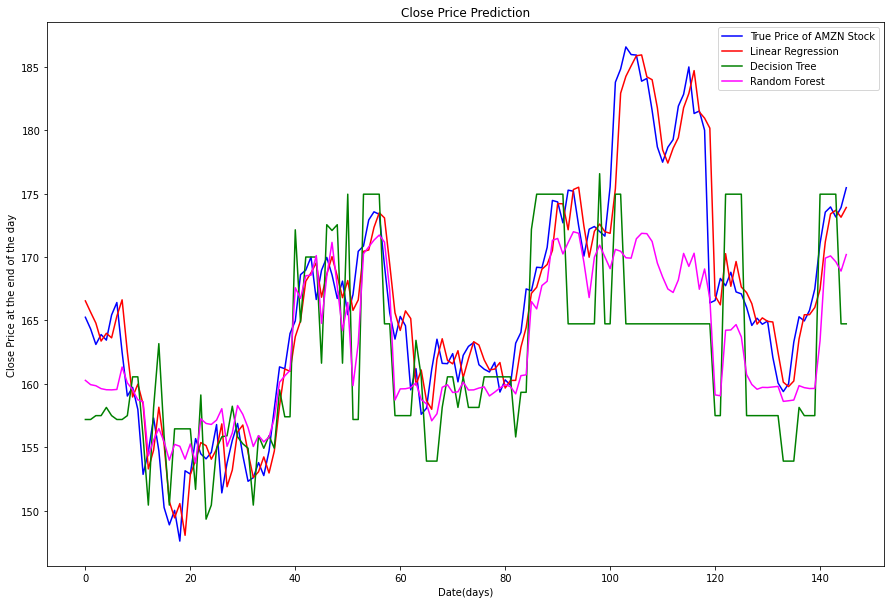

In [46]:
#let's plot the results
plt.figure(figsize=(15,10))
plt.plot(y_test[:,0], color='blue', label='True Price of ' + STOCK_NAME + ' Stock')
plt.plot(lr_pred, color='red', label='Linear Regression')
plt.plot(dt_pred, color='green', label='Decision Tree')
plt.plot(rf_pred, color='magenta', label='Random Forest')
plt.legend()
plt.title("Close Price Prediction")
plt.xlabel("Date(days)")
plt.ylabel("Close Price at the end of the day")
plt.show()
# only plottting 3 models to make it more clear


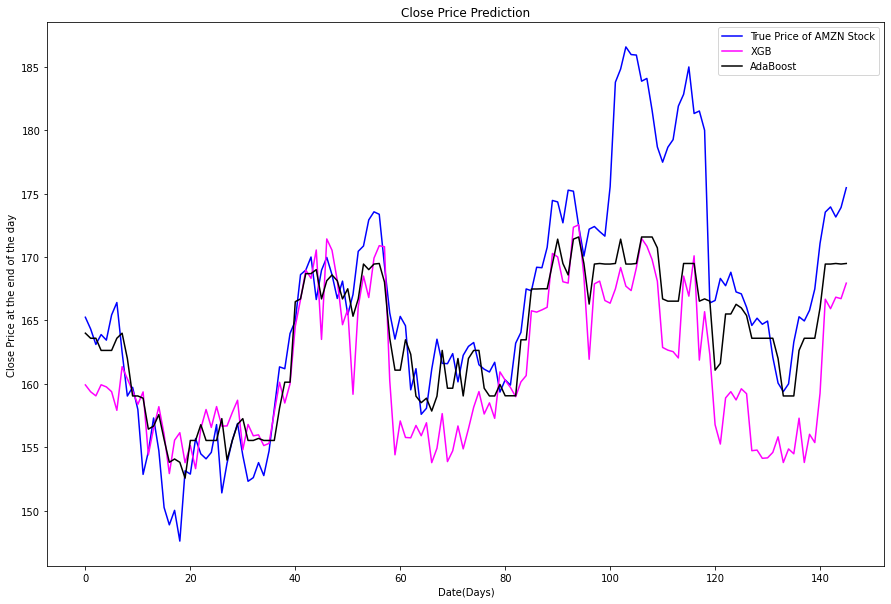

In [47]:
# plotting other 2 models with true price of the stock
plt.figure(figsize=(15,10))
plt.plot(y_test[:,0], color='blue', label='True Price of ' + STOCK_NAME + ' Stock')
plt.plot(xgb_pred, color='magenta', label='XGB')
plt.plot(ada_pred, color='black', label='AdaBoost')

plt.legend()
plt.title("Close Price Prediction")
plt.xlabel("Date(Days)")
plt.ylabel("Close Price at the end of the day")
plt.show()

## For the ultimate model we will combine all these models into a voting model

In [48]:
# now we will combine all the models and make a voting regressor
from sklearn.ensemble import VotingRegressor

voting_regressor = VotingRegressor([('lr', lr_model), ('dt', dt_model), ('rf', rf_model), ('xgb', xgb_model), ('ada', ada_regressor_model)])
# training voting regressor model and predicting values
voting_regressor.fit(X_train_all, y_train[:,0])
voting_pred = voting_regressor.predict(X_test_all)

# calculating rmse, mae and evs for our new model
voting_rmse = math.sqrt(mean_squared_error(y_test[:,0], voting_pred))
voting_mae = mean_absolute_error(y_test[:,0], voting_pred)
voting_evs = explained_variance_score(y_test[:,0], voting_pred)

print("Performance Metrics for Voting Regressor")
print("---------------------------------------")
print("Model\t \t \t RMSE \t \t \t MAE \t \t\t EVS")
print("Voting Regressor\t", voting_rmse, "\t", voting_mae, "\t", voting_evs)
print("---------------------------------------")



Performance Metrics for Voting Regressor
---------------------------------------
Model	 	 	 RMSE 	 	 	 MAE 	 		 EVS
Voting Regressor	 5.22726310244359 	 3.8631781614008247 	 0.752716366535722
---------------------------------------


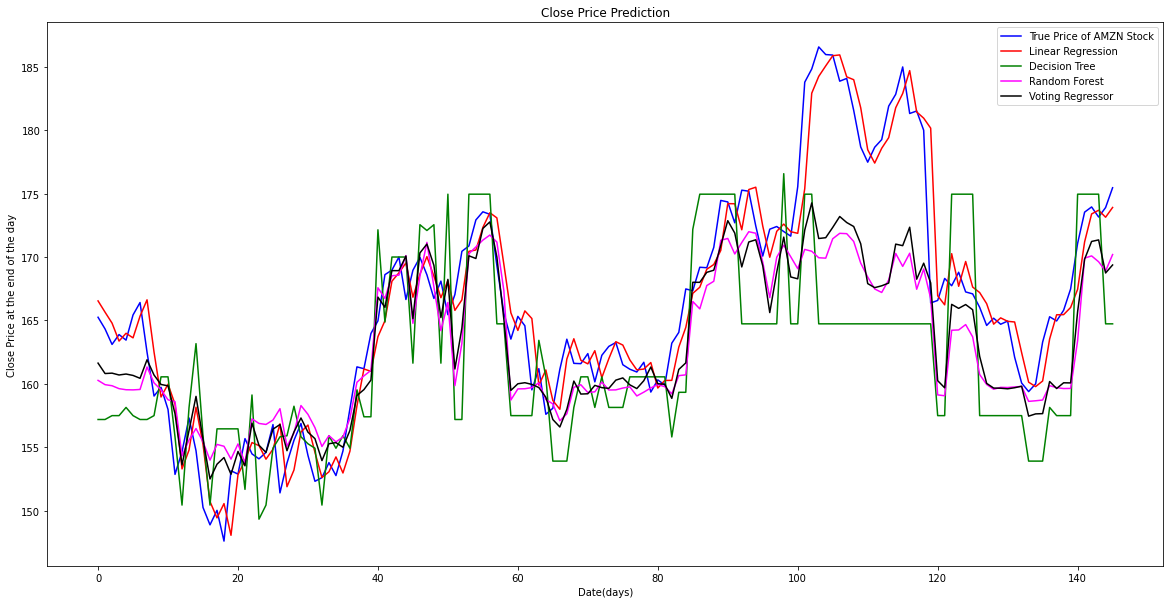

In [49]:

#let's plot the results
plt.figure(figsize=(20,10))
plt.plot(y_test[:,0], color='blue', label='True Price of ' + STOCK_NAME + ' Stock')
plt.plot(lr_pred, color='red', label='Linear Regression')
plt.plot(dt_pred, color='green', label='Decision Tree')
plt.plot(rf_pred, color='magenta', label='Random Forest')
plt.plot(voting_pred, color='black', label='Voting Regressor')
plt.legend()
plt.title("Close Price Prediction")
plt.xlabel("Date(days)")
plt.ylabel("Close Price at the end of the day")
plt.show()

In [50]:
# to further improve our model we will use hyperparameter tuning
# we can do this by using GridSearchCV
# we will use GridSearchCV
from sklearn.model_selection import GridSearchCV

# creating parameter grid to pass in GridSearchCV 
# so that it will try all the combinations and find the best parameters
param_grid = {'lr__fit_intercept': [True, False],
                'dt__criterion': ['friedman_mse', 'mae'],
                'dt__splitter': ['best', 'random'],
                'rf__n_estimators': [10, 50, 100],
                'rf__criterion': ['friedman_mse', 'absolute_error'],
                'xgb__n_estimators': [10, 50, 100],
                'xgb__booster': ['gbtree', 'gblinear'],
                'xgb__learning_rate': [0.01, 0.1, 0.2],
                'ada__n_estimators': [10, 50, 100],
                'ada__learning_rate': [0.01, 0.1, 0.2]
}

# we already have our model voting_regressor
# we will pass this model in GridSearchCV
# cross validation is 3 because it takes too much time to train
grid_search = GridSearchCV(estimator=voting_regressor, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# training grid search object
grid_search.fit(X_train_all, y_train[:,0])
# printing best parameters and best estimator
print(grid_search.best_params_)
print(grid_search.best_estimator_)
grid_pred = grid_search.predict(X_test_all) # predicting values
# calculating rmse, mae and evs for our model updated with best parameters
grid_rmse = math.sqrt(mean_squared_error(y_test[:,0], grid_pred))
grid_mae = mean_absolute_error(y_test[:,0], grid_pred)
grid_evs = explained_variance_score(y_test[:,0], grid_pred)

print("Performance Metrics for Grid Search CV")
print("---------------------------------------")
print("Model\t \t \t RMSE \t \t \t MAE \t \t\t EVS")
print("Grid Search CV\t\t", grid_rmse, "\t", grid_mae, "\t", grid_evs)
print("---------------------------------------")


Fitting 3 folds for each of 7776 candidates, totalling 23328 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


11664 fits failed out of a total of 23328.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1801 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_voting.py", line 598, in fit
    return super().fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

{'ada__learning_rate': 0.1, 'ada__n_estimators': 50, 'dt__criterion': 'friedman_mse', 'dt__splitter': 'random', 'lr__fit_intercept': True, 'rf__criterion': 'friedman_mse', 'rf__n_estimators': 100, 'xgb__booster': 'gbtree', 'xgb__learning_rate': 0.2, 'xgb__n_estimators': 50}
VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('dt',
                             DecisionTreeRegressor(criterion='friedman_mse',
                                                   splitter='random')),
                            ('rf',
                             RandomForestRegressor(criterion='friedman_mse')),
                            ('xgb',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, devi

In [51]:
# let's print the performance metrics for train data as well
# calculating rmse for train data
grid_pred_train = grid_search.predict(X_train_all)
grid_rmse_train = math.sqrt(mean_squared_error(y_train[:,0], grid_pred_train))
#calculating mae for train data
grid_mae_train = mean_absolute_error(y_train[:,0], grid_pred_train)
# calculating explained variance score for train data
grid_evs_train = explained_variance_score(y_train[:,0], grid_pred_train)
# let's print all these as a table
print("Performance Metrics for Grid Search CV on Train Data")
print("Where RMSE is Root Mean Squared Error, MAE is Mean Absolute Error and EVS is Explained Variance Score")
print("---------------------------------------")
print("Model\t \t \t RMSE \t \t \t MAE \t \t\t EVS")
print("Grid Search CV\t\t", grid_rmse_train, "\t", grid_mae_train, "\t", grid_evs_train)
print("---------------------------------------")


Performance Metrics for Grid Search CV on Train Data
Where RMSE is Root Mean Squared Error, MAE is Mean Absolute Error and EVS is Explained Variance Score
---------------------------------------
Model	 	 	 RMSE 	 	 	 MAE 	 		 EVS
Grid Search CV		 1.253295037517218 	 0.9238972252431162 	 0.99829293073924
---------------------------------------


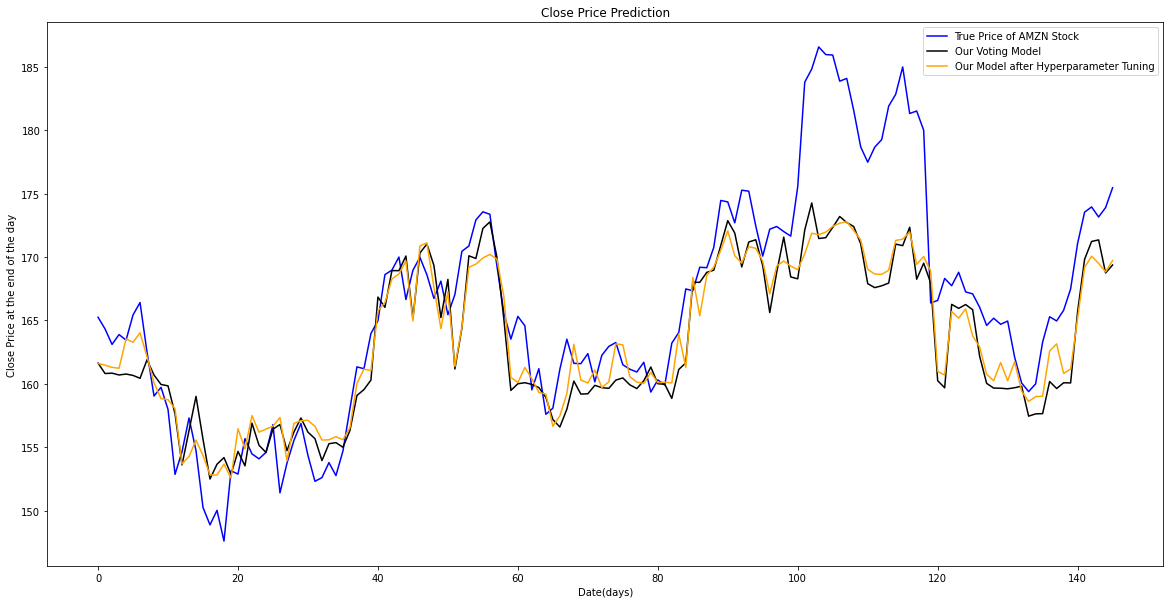

In [52]:
# let's plot the results
plt.figure(figsize=(20,10))
plt.plot(y_test[:,0], color='blue', label='True Price of ' + STOCK_NAME + ' Stock')
plt.plot(voting_pred, color='black', label='Our Voting Model')
plt.plot(grid_pred, color='orange', label='Our Model after Hyperparameter Tuning')
plt.legend()
plt.title("Close Price Prediction")
plt.xlabel("Date(days)")
plt.ylabel("Close Price at the end of the day")
plt.show()



## Let's Compare Our Model with Baseline Models

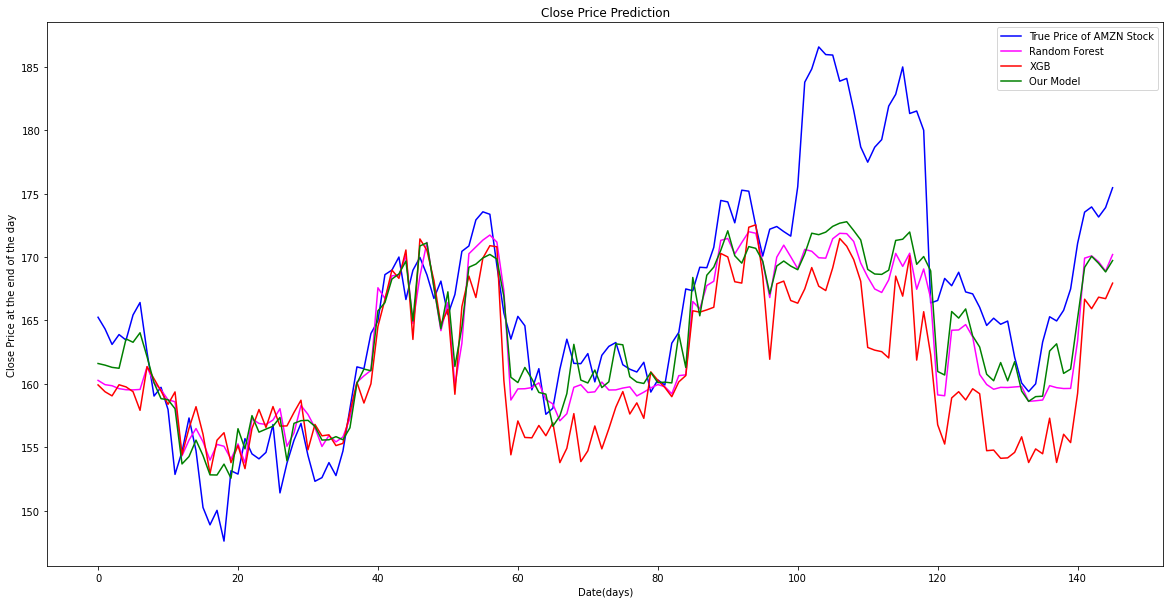

In [53]:
# let's plot the results with some base models
plt.figure(figsize=(20,10))
plt.plot(y_test[:,0], color='blue', label='True Price of ' + STOCK_NAME + ' Stock')
plt.plot(rf_pred, color='magenta', label='Random Forest')
plt.plot(xgb_pred, color='red', label='XGB')
plt.plot(grid_pred, color='green', label='Our Model')
plt.legend()
plt.title("Close Price Prediction")
plt.xlabel("Date(days)")
plt.ylabel("Close Price at the end of the day")
plt.show()


